In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#200 eV-ra a Bragg görbe kirajzolása

# A fájl elérési útvonalának megadása
file_path = '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data200eV = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df200eV = pd.DataFrame(data200eV)

# Az adatok megjelenítése
print(df200eV.head())

   PDGEncoding  trackID  parentID          time  eventID       posX      posY  \
0         2212        1         0  4.612551e-09        0  12.875459 -0.045897   
1         2212        1         0  5.053970e-09        0  15.330603  0.861206   
2         2212        1         0  5.383410e-09        0  17.097225  1.659230   
3         2212        1         0  5.426075e-09        0  17.336983  1.726660   
4         2212        1         0  5.469879e-09        0  17.604889  1.849732   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.044687  0.009984  ...            0            1            0   
1  283.153992  0.044089  0.020782  ...            0            1            0   
2  326.093994  0.045484  0.014266  ...            0            1            1   
3  331.593994  0.045002  0.022530  ...            0            1            1   
4  337.093994  0.051101  0.031774  ...            0            1            1   

   volumeID[3]  volumeID[4

In [3]:
df200eV['Layer'] = 2*df200eV["volumeID[2]"]+df200eV["volumeID[3]"]
column_names200eV = df200eV.columns
print("Oszlopnevek:", column_names200eV)

Oszlopnevek: Index(['PDGEncoding', 'trackID', 'parentID', 'time', 'eventID', 'posX', 'posY',
       'posZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'volumeID[0]',
       'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]',
       'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]',
       'volumeID[9]', 'Layer'],
      dtype='object')


In [4]:
Layers200eV = df200eV.Layer.unique() 
Myenergy200eV = np.zeros(len(Layers200eV))
for i,k in enumerate(Layers200eV):
    Myenergy200eV[i] = (df200eV[df200eV.Layer== k]["edep"].sum())

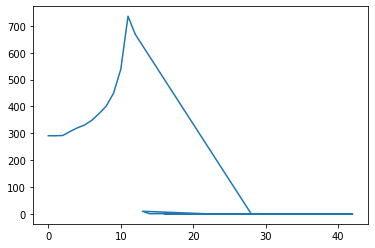

In [5]:
plt.plot(Layers200eV, Myenergy200eV)

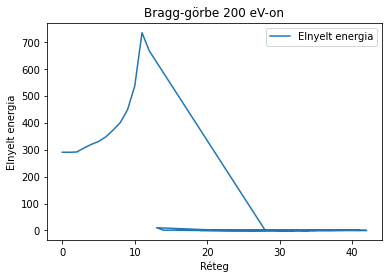

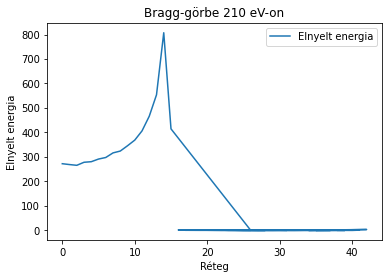

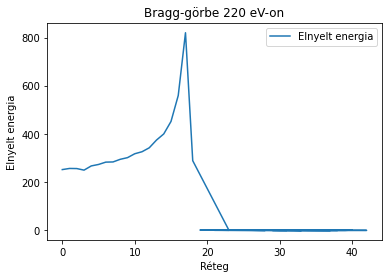

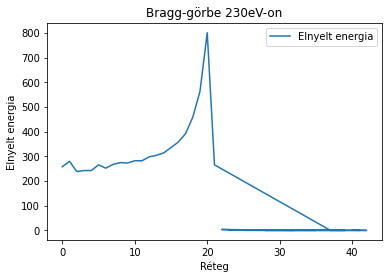

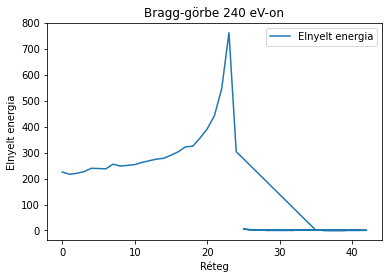

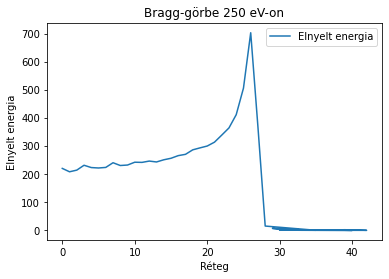

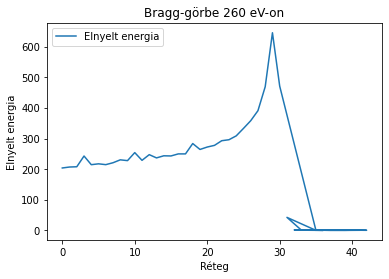

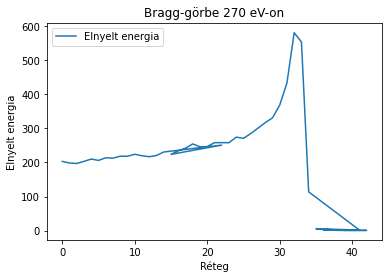

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    # További fájlok elérési útvonala a mintához hasonlóan
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    '200 eV', '210 eV', '220 eV', '230eV', '240 eV', '250 eV', '260 eV', '270 eV'
    # További energiaértékek hozzáadása, megfeleltetve a fájlnevekkel
]

for file_path, energy in zip(file_paths, energy_values):
    # A fájl beolvasása numpy tömbként
    data = np.load(file_path)

    # A numpy tömb konvertálása pandas DataFrame-é
    df = pd.DataFrame(data)

    # "Layer" oszlop hozzáadása a DataFrame-hez
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]

    # Az egyes rétegekben elnyelt energia kiszámítása
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()

    # Az elnyelt energia kirajzolása az egyes rétegekben
    plt.figure()  # Új figura létrehozása minden egyes görbéhez
    plt.plot(Layers, Myenergy, label=f'Elnyelt energia')
    plt.xlabel('Réteg')
    plt.ylabel('Elnyelt energia')
    plt.title(f'Bragg-görbe {energy}-on')
    plt.legend()
    plt.show()


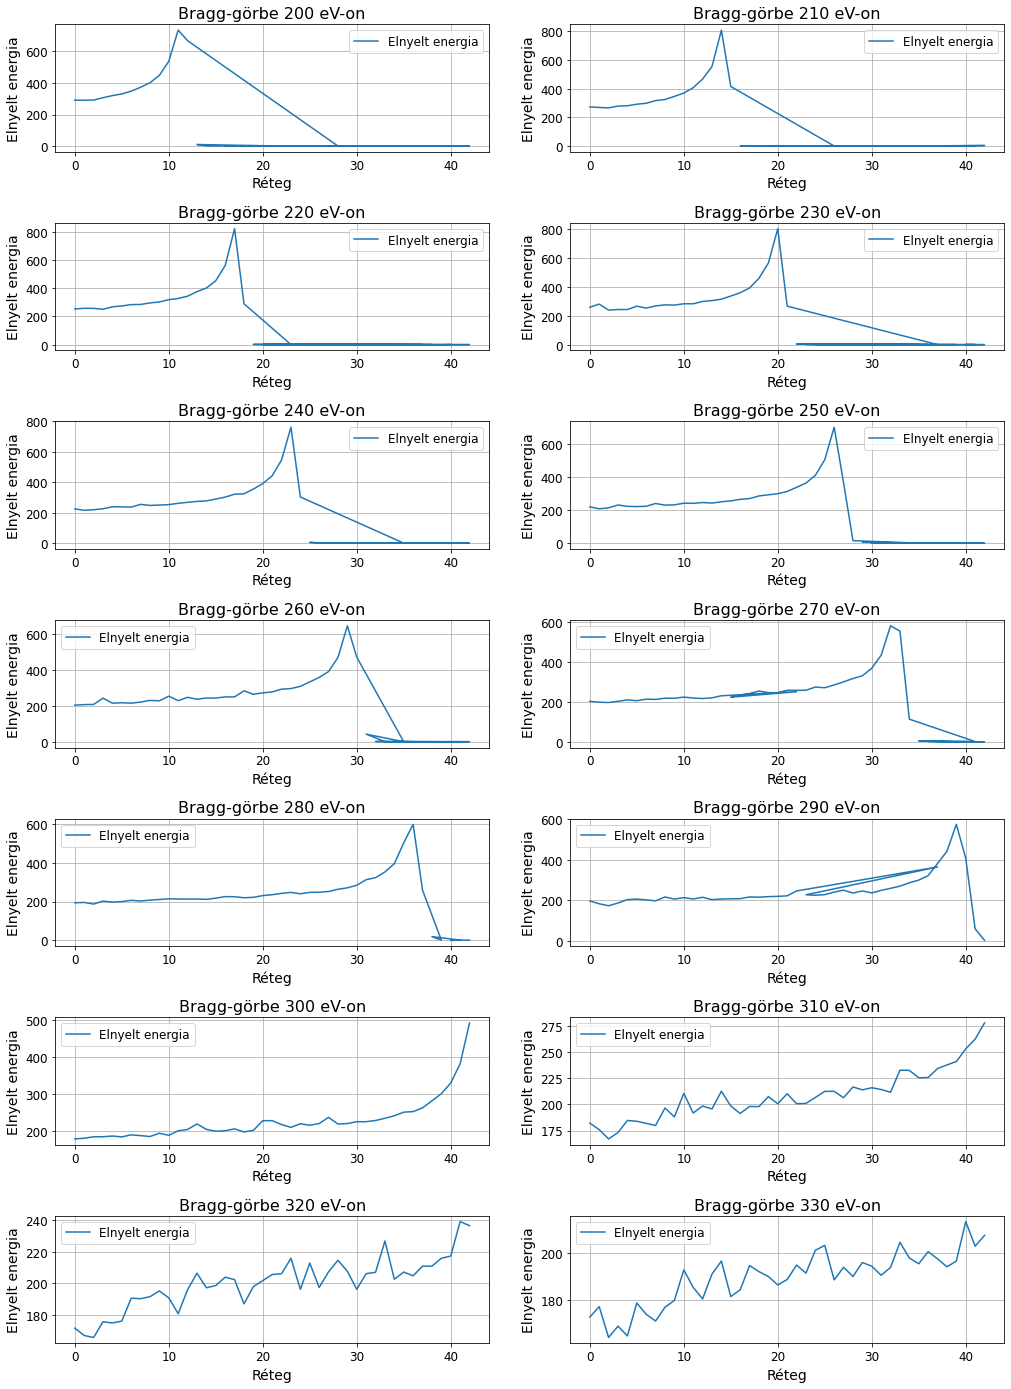

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    '320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    '330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
    
    # További fájlok elérési útvonala a mintához hasonlóan
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    '200 eV', '210 eV', '220 eV', '230 eV', '240 eV', '250 eV', '260 eV', '270 eV', '280 eV', '290 eV', '300 eV', '310 eV',
    '320 eV', '330 eV', 
    # További energiaértékek hozzáadása, megfeleltetve a fájlnevekkel
]

# 4 sor x 2 oszlop beállítása a grafikonok számára, hogy minden fájlhoz jusson hely
fig, axs = plt.subplots(7, 2, figsize=(15, 20))  # Négy sor, két oszlop
fig.tight_layout(pad=5.0)  # Biztosítja, hogy legyen hely a címeknek és tengelyfeliratoknak

# A for ciklus átalakítása, hogy kezelje az axs tömböt, ami most már 2D-s
for idx, (file_path, energy) in enumerate(zip(file_paths, energy_values)):
    ax = axs[idx // 2, idx % 2]  # A subplot indexének megfelelő kiszámítása
    
    # A fájl beolvasása numpy tömbként
    data = np.load(file_path)

    # A numpy tömb konvertálása pandas DataFrame-é
    df = pd.DataFrame(data)

    # "Layer" oszlop hozzáadása a DataFrame-hez
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]

    # Az egyes rétegekben elnyelt energia kiszámítása
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()
    
    # Az elnyelt energia kirajzolása az egyes rétegekben
    ax.plot(Layers, Myenergy, label='Elnyelt energia')
    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia', fontsize=14)
    ax.set_title(f'Bragg-görbe {energy}-on', fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True)  # Grid hozzáadása
    ax.tick_params(axis='both', which='major', labelsize=12)  # Tengelyfeliratok méretének beállítása

plt.show()


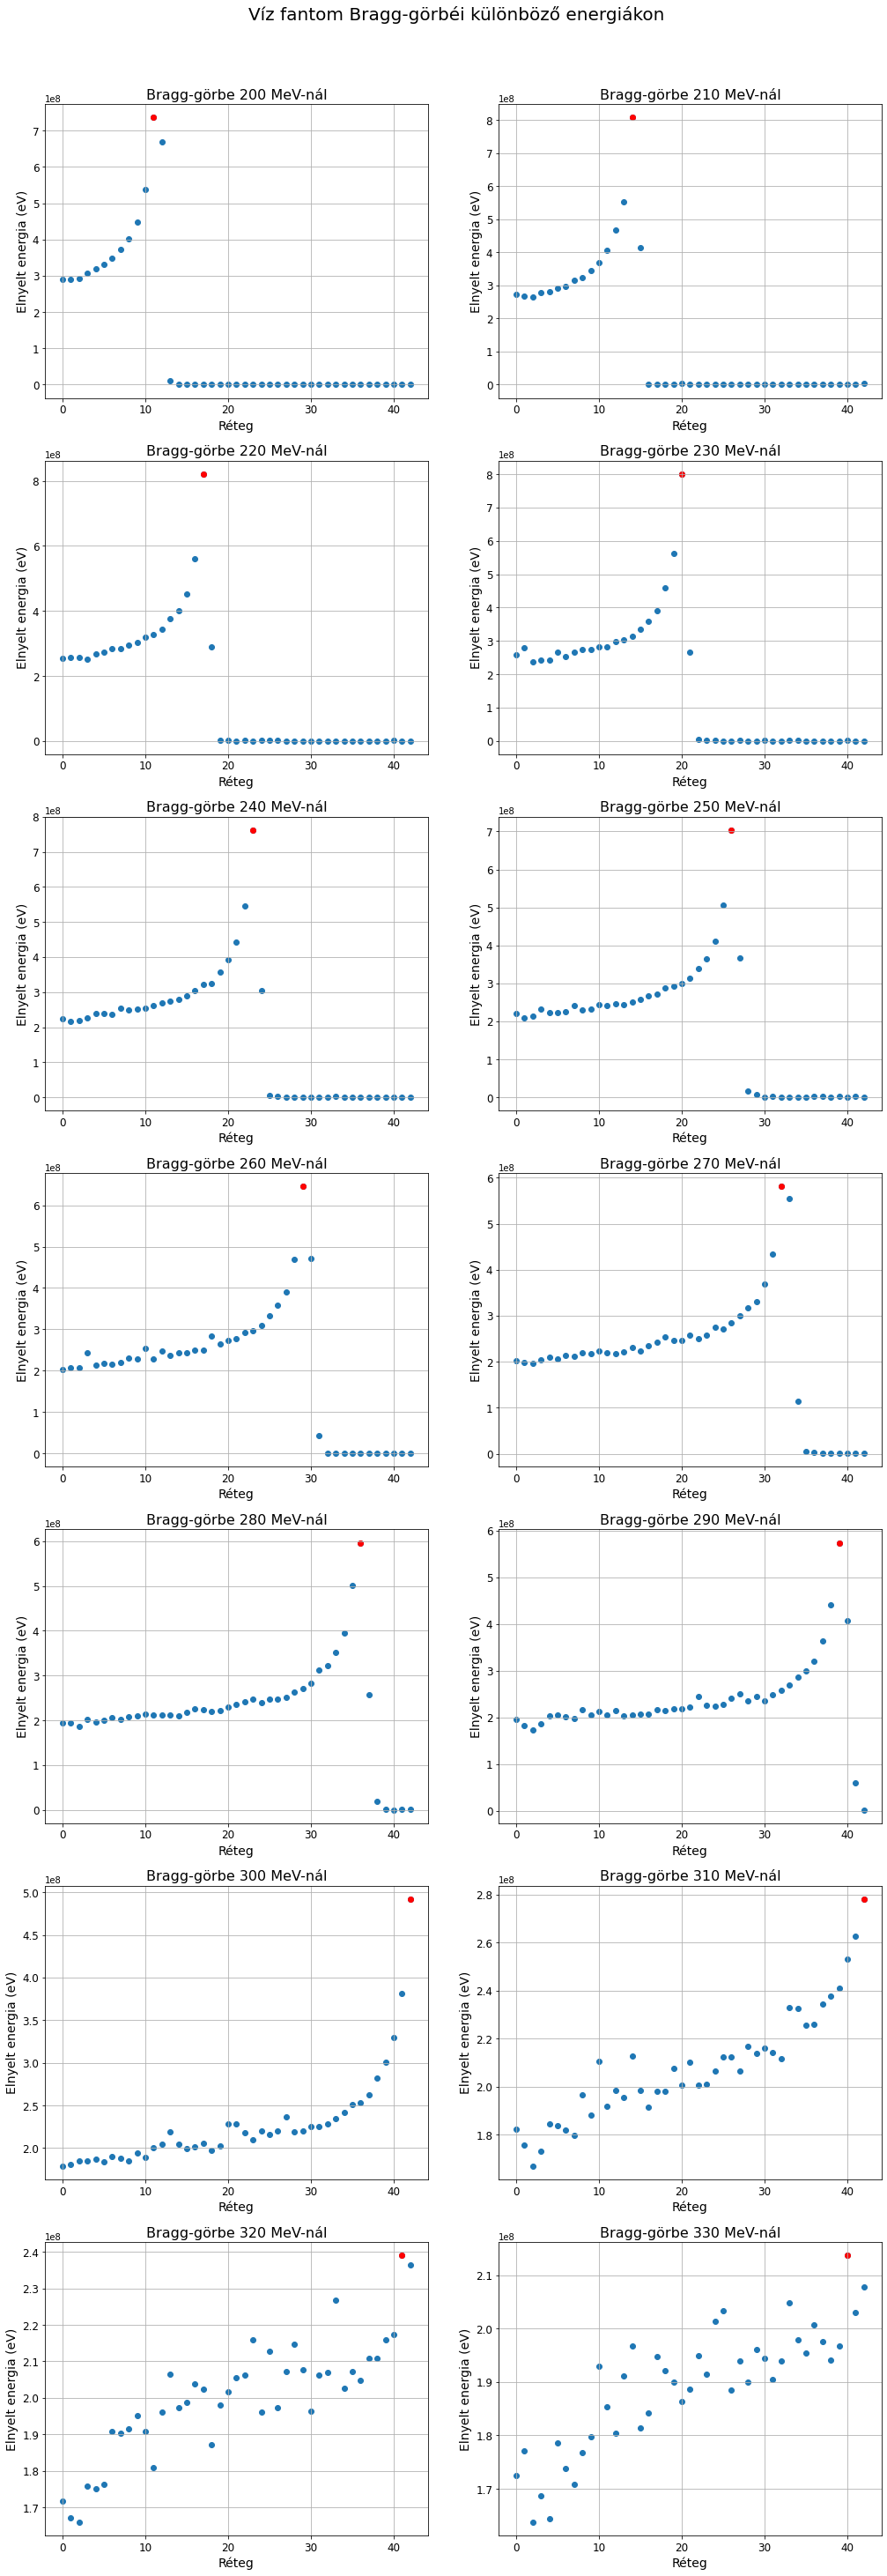

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    # Fájl elérési útvonalak...
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    #'310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    #'320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    #'330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
    
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    # Energiaértékek...
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV', 
    #'310 MeV', '320 MeV', '330 MeV'
]

# Grafikonok beállítása
fig, axs = plt.subplots(7, 2, figsize=(15, 40))  # Méret módosítása, hogy minden grafikon elférjen
fig.tight_layout(pad=5.0)  # Több hely biztosítása
fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)  # Központi cím hozzáadása

for idx, (file_path, energy) in enumerate(zip(file_paths, energy_values)):
    ax = axs[idx // 2, idx % 2]

    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6  # Az energiát MeV-ből eV-be konvertáljuk
    
    # A Bragg-csúcs megkeresése
    max_energy_index = Myenergy.argmax()
    max_layer = Layers[max_energy_index]
    max_energy = Myenergy[max_energy_index]
    
    # Scatter plot rajzolása
    ax.scatter(Layers, Myenergy)
    # A Bragg-csúcs kiemelése piros ponttal
    ax.scatter(max_layer, max_energy, color='red')
    
    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)  # Megjegyzés a változtatásra
    ax.set_title(f'Bragg-görbe {energy}-nál', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


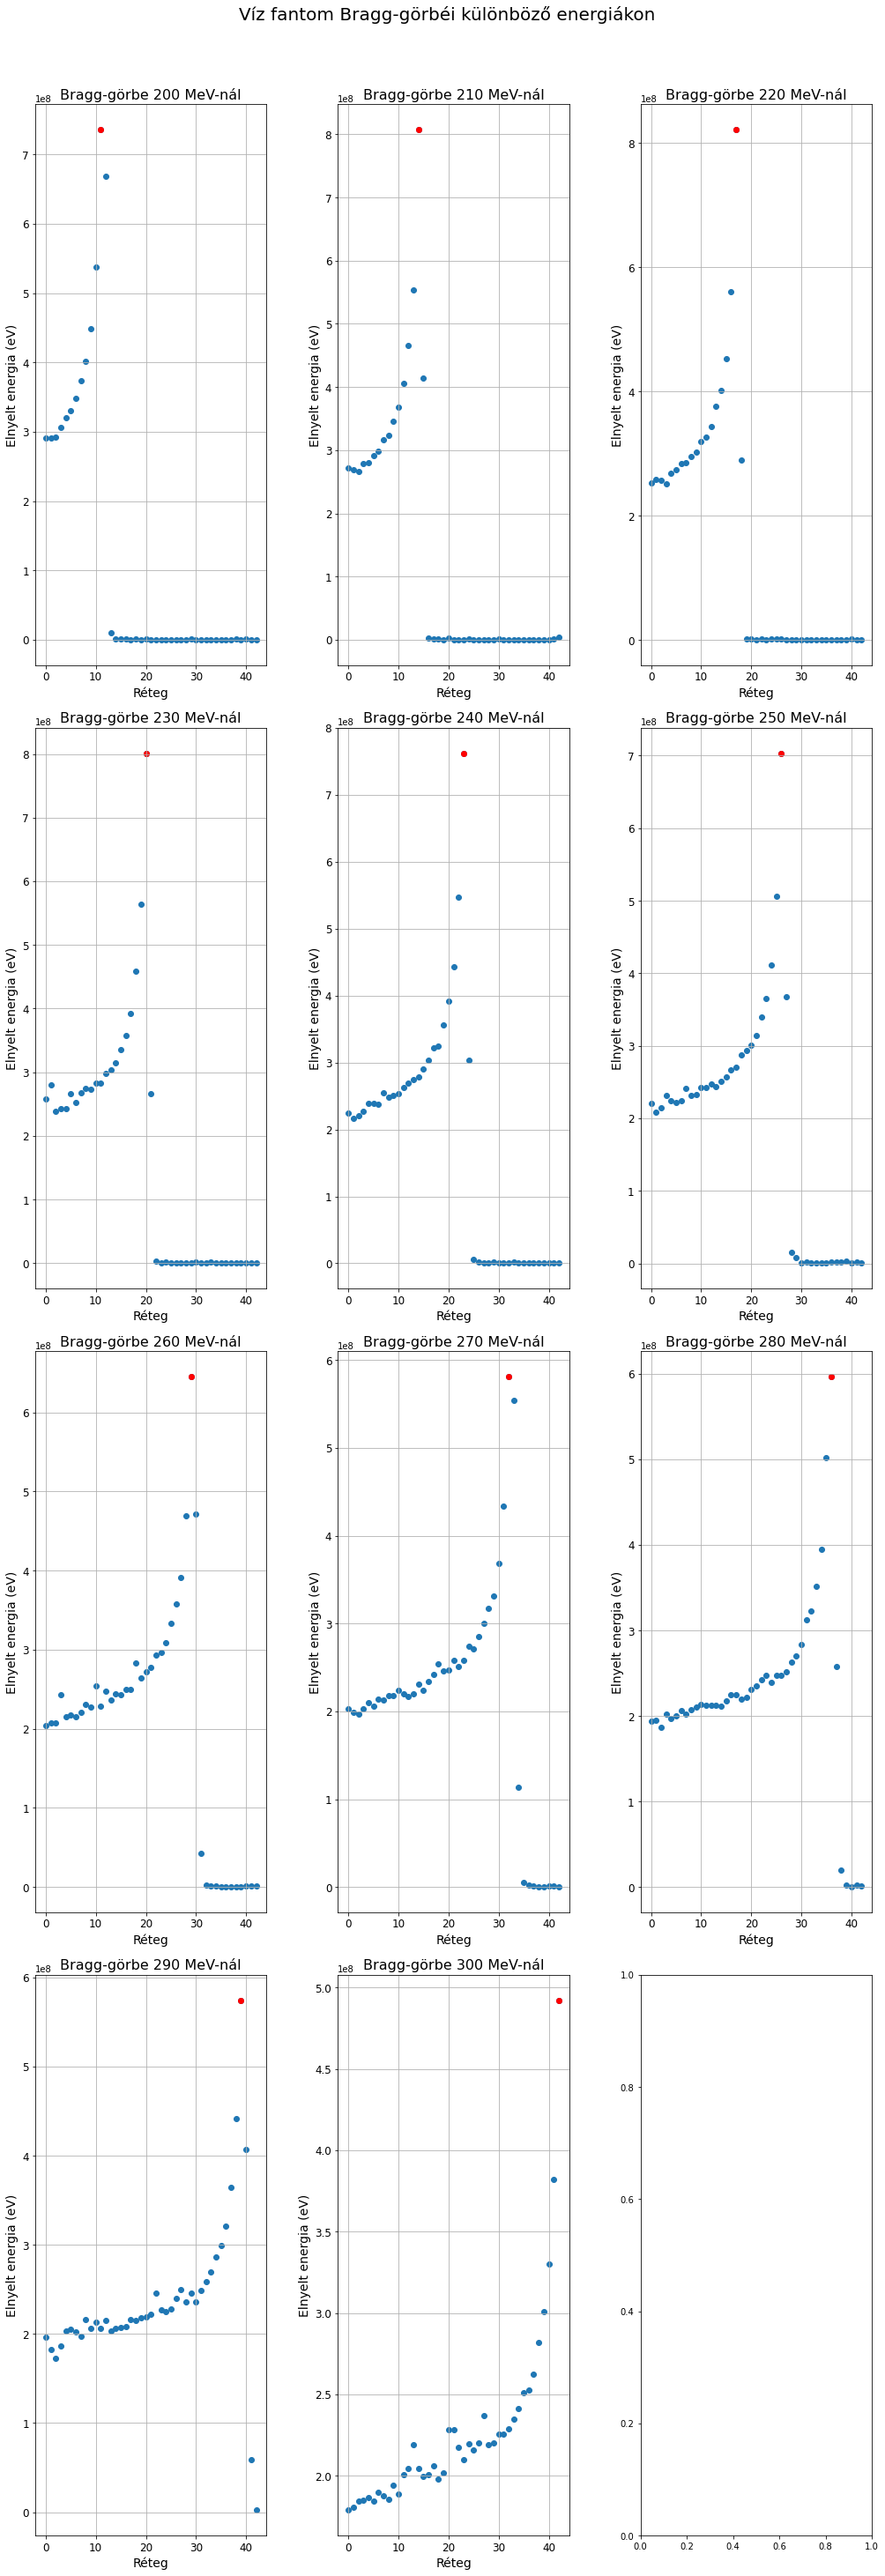

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A fájlnevek és azok teljes elérési útvonalainak listája
file_paths = [
    # Fájl elérési útvonalak...
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]

# Az energiaértékek listája, megfeleltetve a fájlnevekkel
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Grafikonok beállítása
fig, axs = plt.subplots(4, 3, figsize=(15, 40))  # 3 oszlopban, 4 sorban
fig.tight_layout(pad=5.0)  # Több hely biztosítása
fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)  # Központi cím hozzáadása

for idx, (file_path, energy) in enumerate(zip(file_paths, energy_values)):
    ax = axs[idx // 3, idx % 3]  # Sor és oszlop indexek módosítása

    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6  # Az energiát MeV-ből eV-be konvertáljuk
    
    # A Bragg-csúcs megkeresése
    max_energy_index = Myenergy.argmax()
    max_layer = Layers[max_energy_index]
    max_energy = Myenergy[max_energy_index]
    
    # Scatter plot rajzolása
    ax.scatter(Layers, Myenergy)
    # A Bragg-csúcs kiemelése piros ponttal
    ax.scatter(max_layer, max_energy, color='red')
    
    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)  # Megjegyzés a változtatásra
    ax.set_title(f'Bragg-görbe {energy}-nál', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


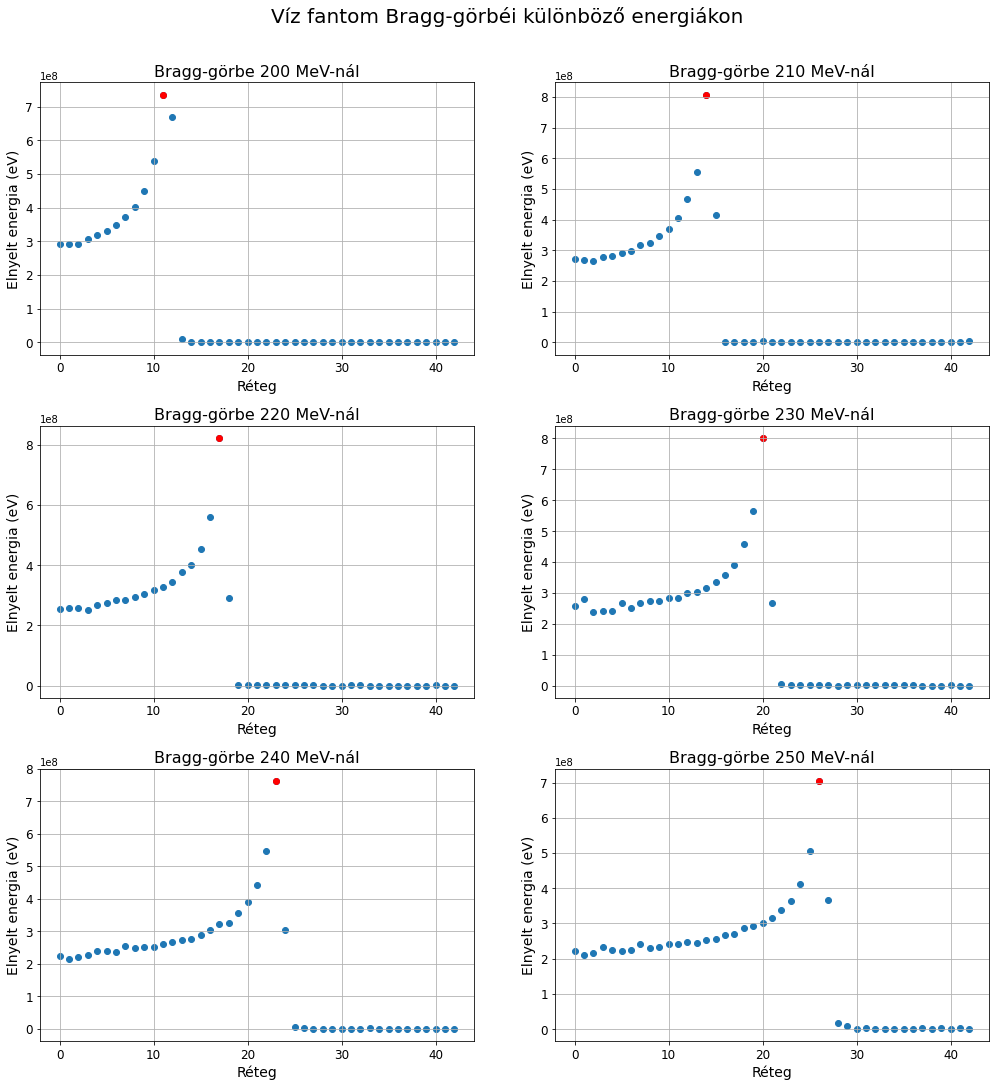

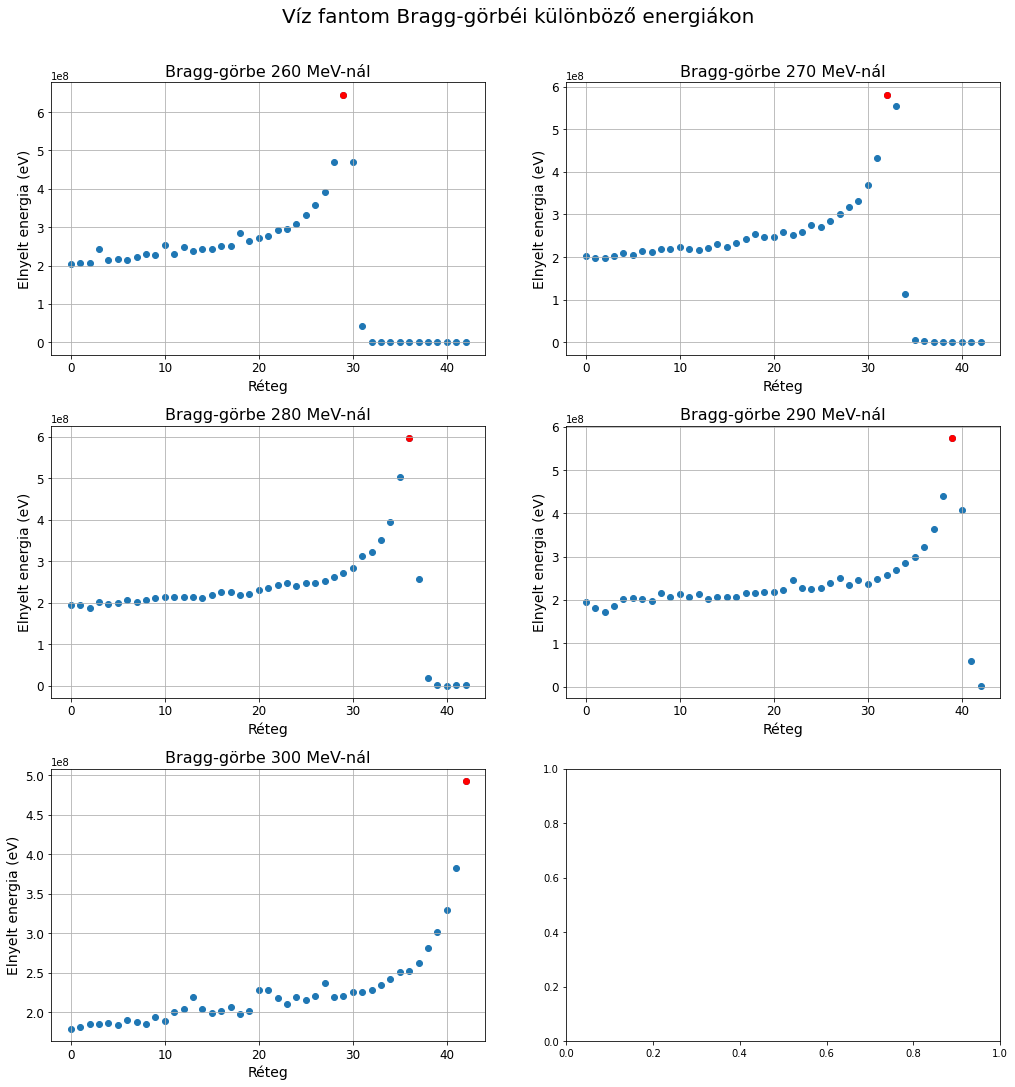

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per figure and rows per figure
plots_per_figure = 6
rows_per_figure = 3

# Create multiple figures based on the number of datasets
for figure_index in range((len(file_paths) + plots_per_figure - 1) // plots_per_figure):
    fig, axs = plt.subplots(rows_per_figure, 2, figsize=(15, 15))
    fig.tight_layout(pad=5.0)
    fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)

    start_index = figure_index * plots_per_figure
    end_index = min(start_index + plots_per_figure, len(file_paths))

    for idx in range(start_index, end_index):
        local_index = idx - start_index
        ax = axs[local_index // 2, local_index % 2]

        data = np.load(file_paths[idx])
        df = pd.DataFrame(data)
        df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]

        Layers = df.Layer.unique()
        Myenergy = np.zeros(len(Layers))
        for i, k in enumerate(Layers):
            Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

        max_energy_index = Myenergy.argmax()
        max_layer = Layers[max_energy_index]
        max_energy = Myenergy[max_energy_index]

        ax.scatter(Layers, Myenergy)
        ax.scatter(max_layer, max_energy, color='red')
        
        ax.set_xlabel('Réteg', fontsize=14)
        ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)
        ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=16)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()


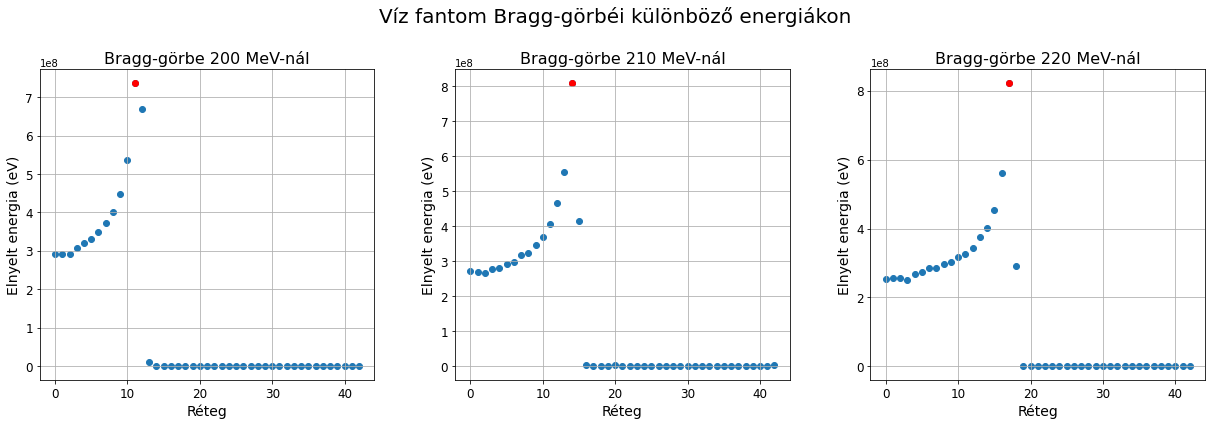

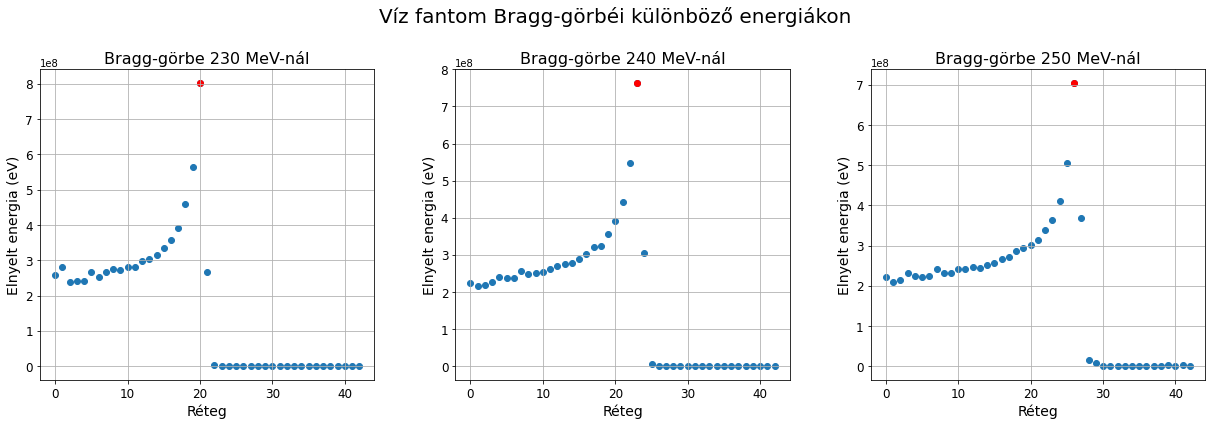

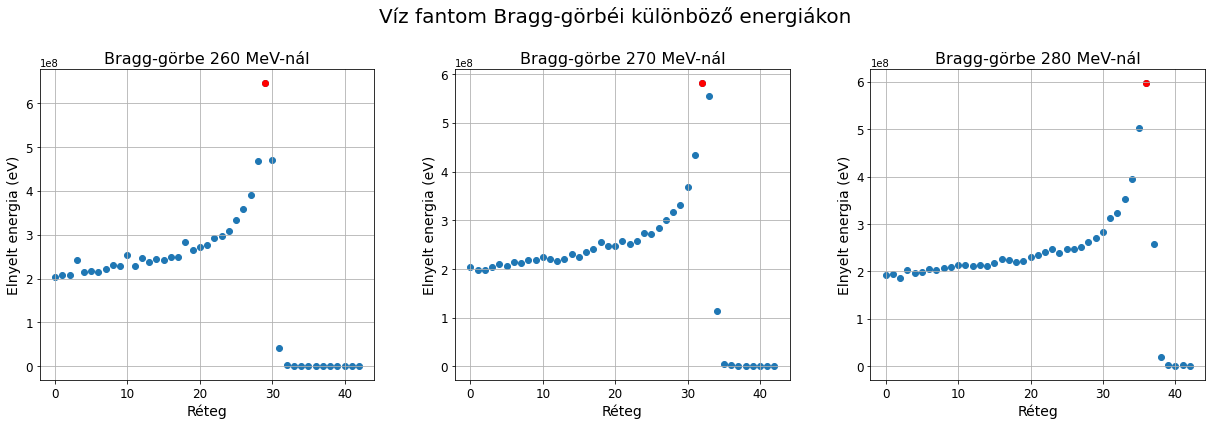

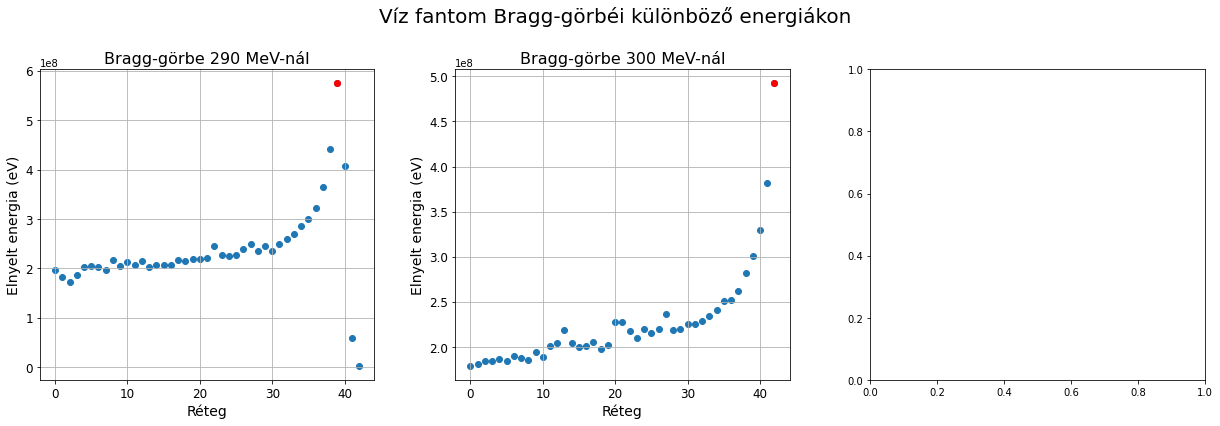

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per figure and rows per figure
plots_per_figure = 3

# Create multiple figures based on the number of datasets
for figure_index in range((len(file_paths) + plots_per_figure - 1) // plots_per_figure):
    fig, axs = plt.subplots(1, plots_per_figure, figsize=(18, 6))
    fig.tight_layout(pad=5.0)
    fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)

    start_index = figure_index * plots_per_figure
    end_index = min(start_index + plots_per_figure, len(file_paths))

    for idx in range(start_index, end_index):
        local_index = idx - start_index
        ax = axs[local_index]

        data = np.load(file_paths[idx])
        df = pd.DataFrame(data)
        df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]

        Layers = df.Layer.unique()
        Myenergy = np.zeros(len(Layers))
        for i, k in enumerate(Layers):
            Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

        max_energy_index = Myenergy.argmax()
        max_layer = Layers[max_energy_index]
        max_energy = Myenergy[max_energy_index]

        ax.scatter(Layers, Myenergy)
        ax.scatter(max_layer, max_energy, color='red')

        ax.set_xlabel('Réteg', fontsize=14)
        ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)
        ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=16)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()


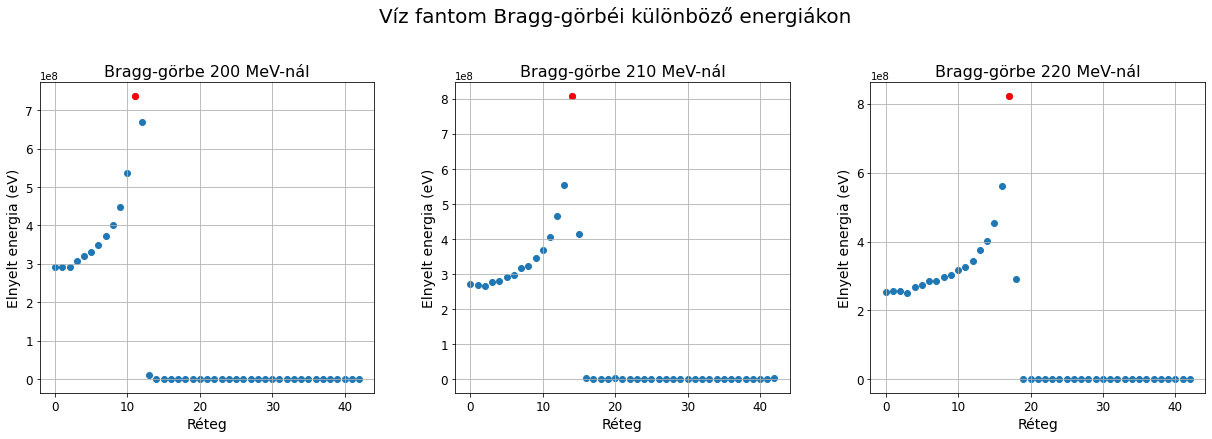

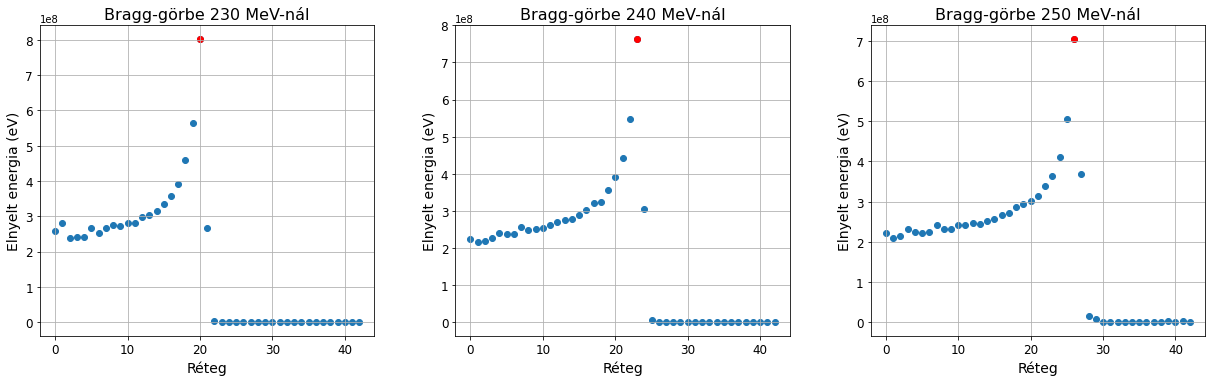

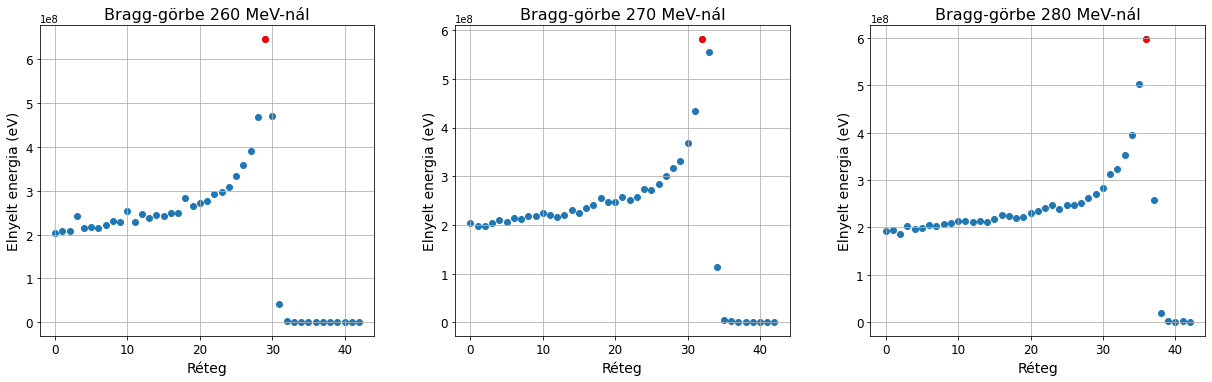

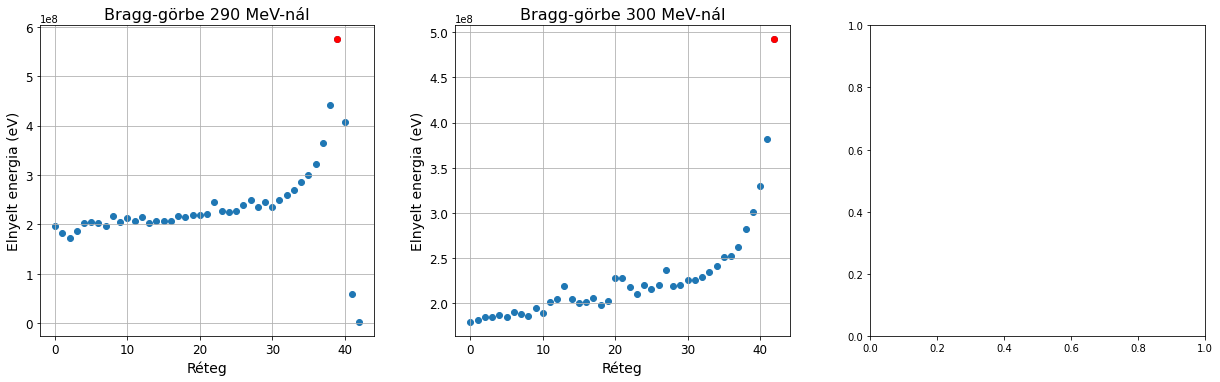

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per figure and rows per figure
plots_per_figure = 3

# Create multiple figures based on the number of datasets
fig_index = 0
for figure_index in range((len(file_paths) + plots_per_figure - 1) // plots_per_figure):
    fig, axs = plt.subplots(1, plots_per_figure, figsize=(18, 6))
    fig.tight_layout(pad=5.0)
    
    if fig_index == 0:
        fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.05)
        fig_index += 1

    start_index = figure_index * plots_per_figure
    end_index = min(start_index + plots_per_figure, len(file_paths))

    for idx in range(start_index, end_index):
        local_index = idx - start_index
        ax = axs[local_index]

        data = np.load(file_paths[idx])
        df = pd.DataFrame(data)
        df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]

        Layers = df.Layer.unique()
        Myenergy = np.zeros(len(Layers))
        for i, k in enumerate(Layers):
            Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

        max_energy_index = Myenergy.argmax()
        max_layer = Layers[max_energy_index]
        max_energy = Myenergy[max_energy_index]

        ax.scatter(Layers, Myenergy)
        ax.scatter(max_layer, max_energy, color='red')

        ax.set_xlabel('Réteg', fontsize=14)
        ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)
        ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=16)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()


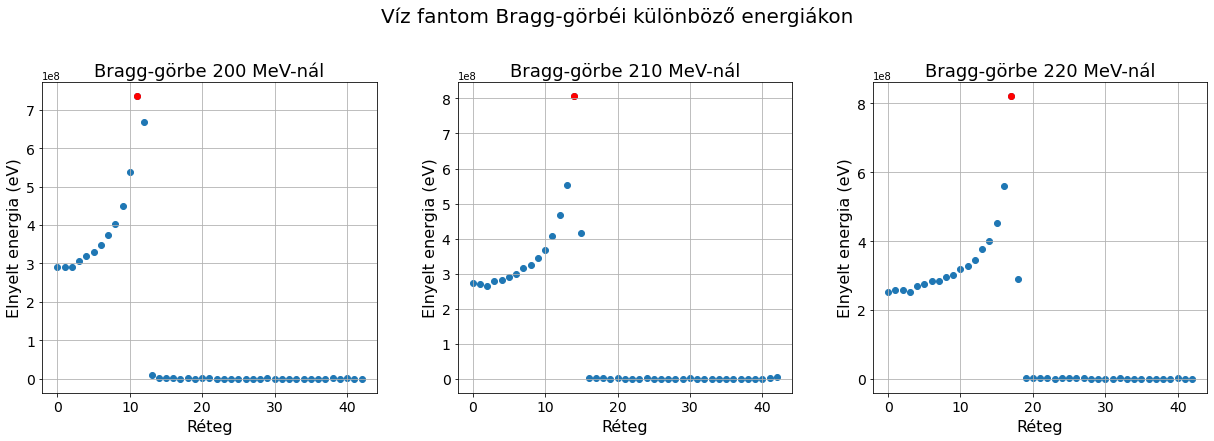

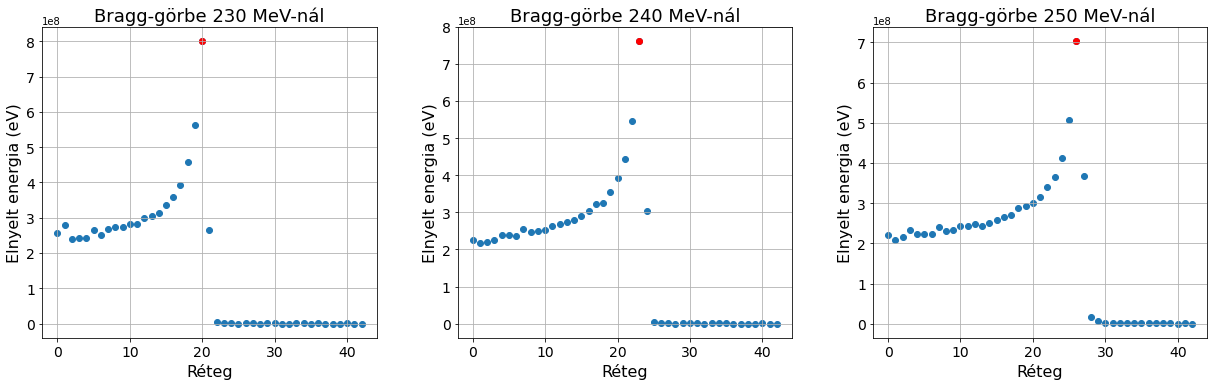

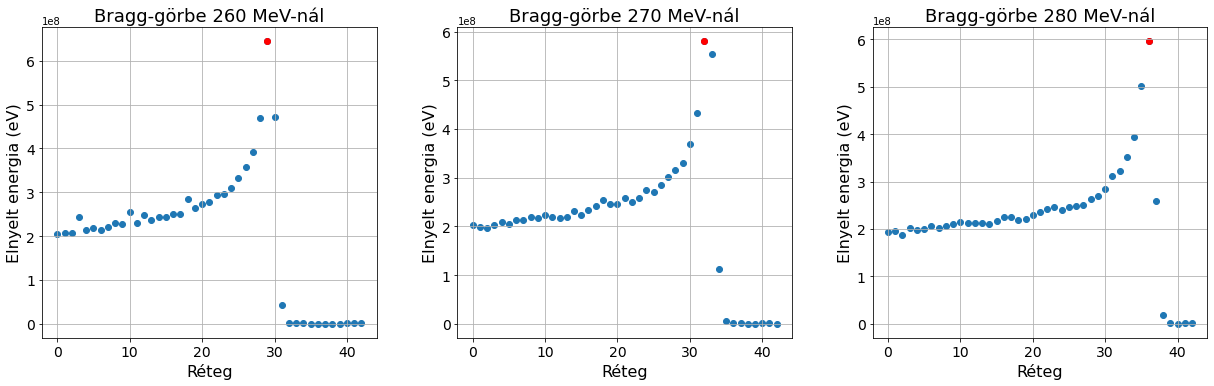

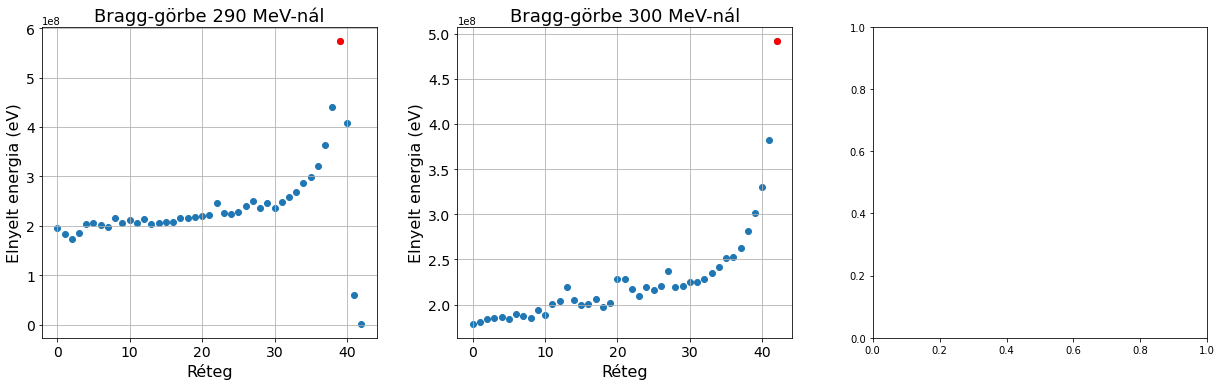

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per figure and rows per figure
plots_per_figure = 3

# Create multiple figures based on the number of datasets
fig_index = 0
for figure_index in range((len(file_paths) + plots_per_figure - 1) // plots_per_figure):
    fig, axs = plt.subplots(1, plots_per_figure, figsize=(18, 6))
    fig.tight_layout(pad=5.0)
    
    if fig_index == 0:
        fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.05)
        fig_index += 1

    start_index = figure_index * plots_per_figure
    end_index = min(start_index + plots_per_figure, len(file_paths))

    for idx in range(start_index, end_index):
        local_index = idx - start_index
        ax = axs[local_index]

        data = np.load(file_paths[idx])
        df = pd.DataFrame(data)
        df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]

        Layers = df.Layer.unique()
        Myenergy = np.zeros(len(Layers))
        for i, k in enumerate(Layers):
            Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

        max_energy_index = Myenergy.argmax()
        max_layer = Layers[max_energy_index]
        max_energy = Myenergy[max_energy_index]

        ax.scatter(Layers, Myenergy)
        ax.scatter(max_layer, max_energy, color='red')

        ax.set_xlabel('Réteg', fontsize=16)
        ax.set_ylabel('Elnyelt energia (eV)', fontsize=16)
        ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=18)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=14)

    plt.show()


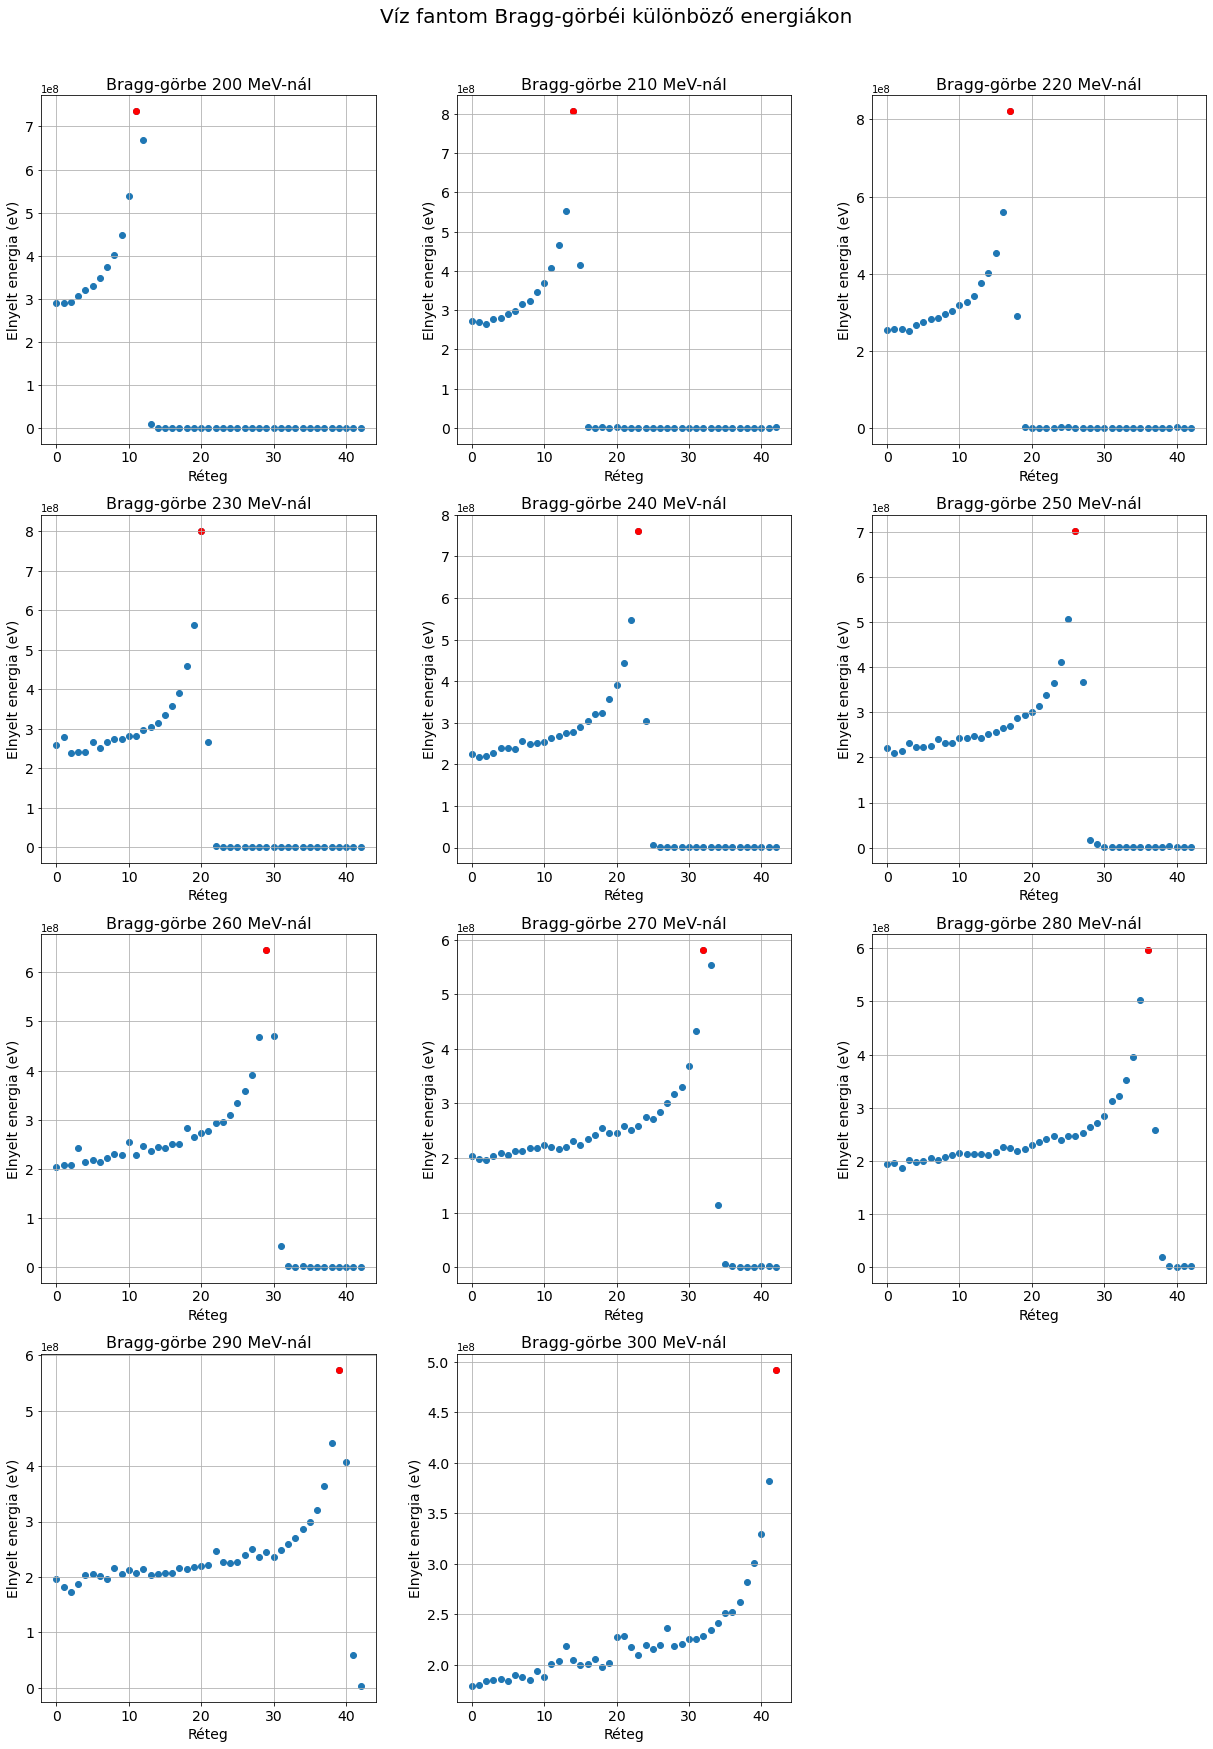

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per row
plots_per_row = 3

# Create multiple figures based on the number of datasets
fig, axs = plt.subplots(4, plots_per_row, figsize=(18, 24))
fig.tight_layout(pad=5.0)
fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)

# Hide the last plot in the last row
axs[3, 2].axis('off')

for idx, file_path in enumerate(file_paths):
    row = idx // plots_per_row
    col = idx % plots_per_row
    
    if row == 3 and col == 2:
        break  # Skip the last cell

    ax = axs[row, col]

    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]

    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

    max_energy_index = Myenergy.argmax()
    max_layer = Layers[max_energy_index]
    max_energy = Myenergy[max_energy_index]

    ax.scatter(Layers, Myenergy)
    ax.scatter(max_layer, max_energy, color='red')

    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)
    ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()


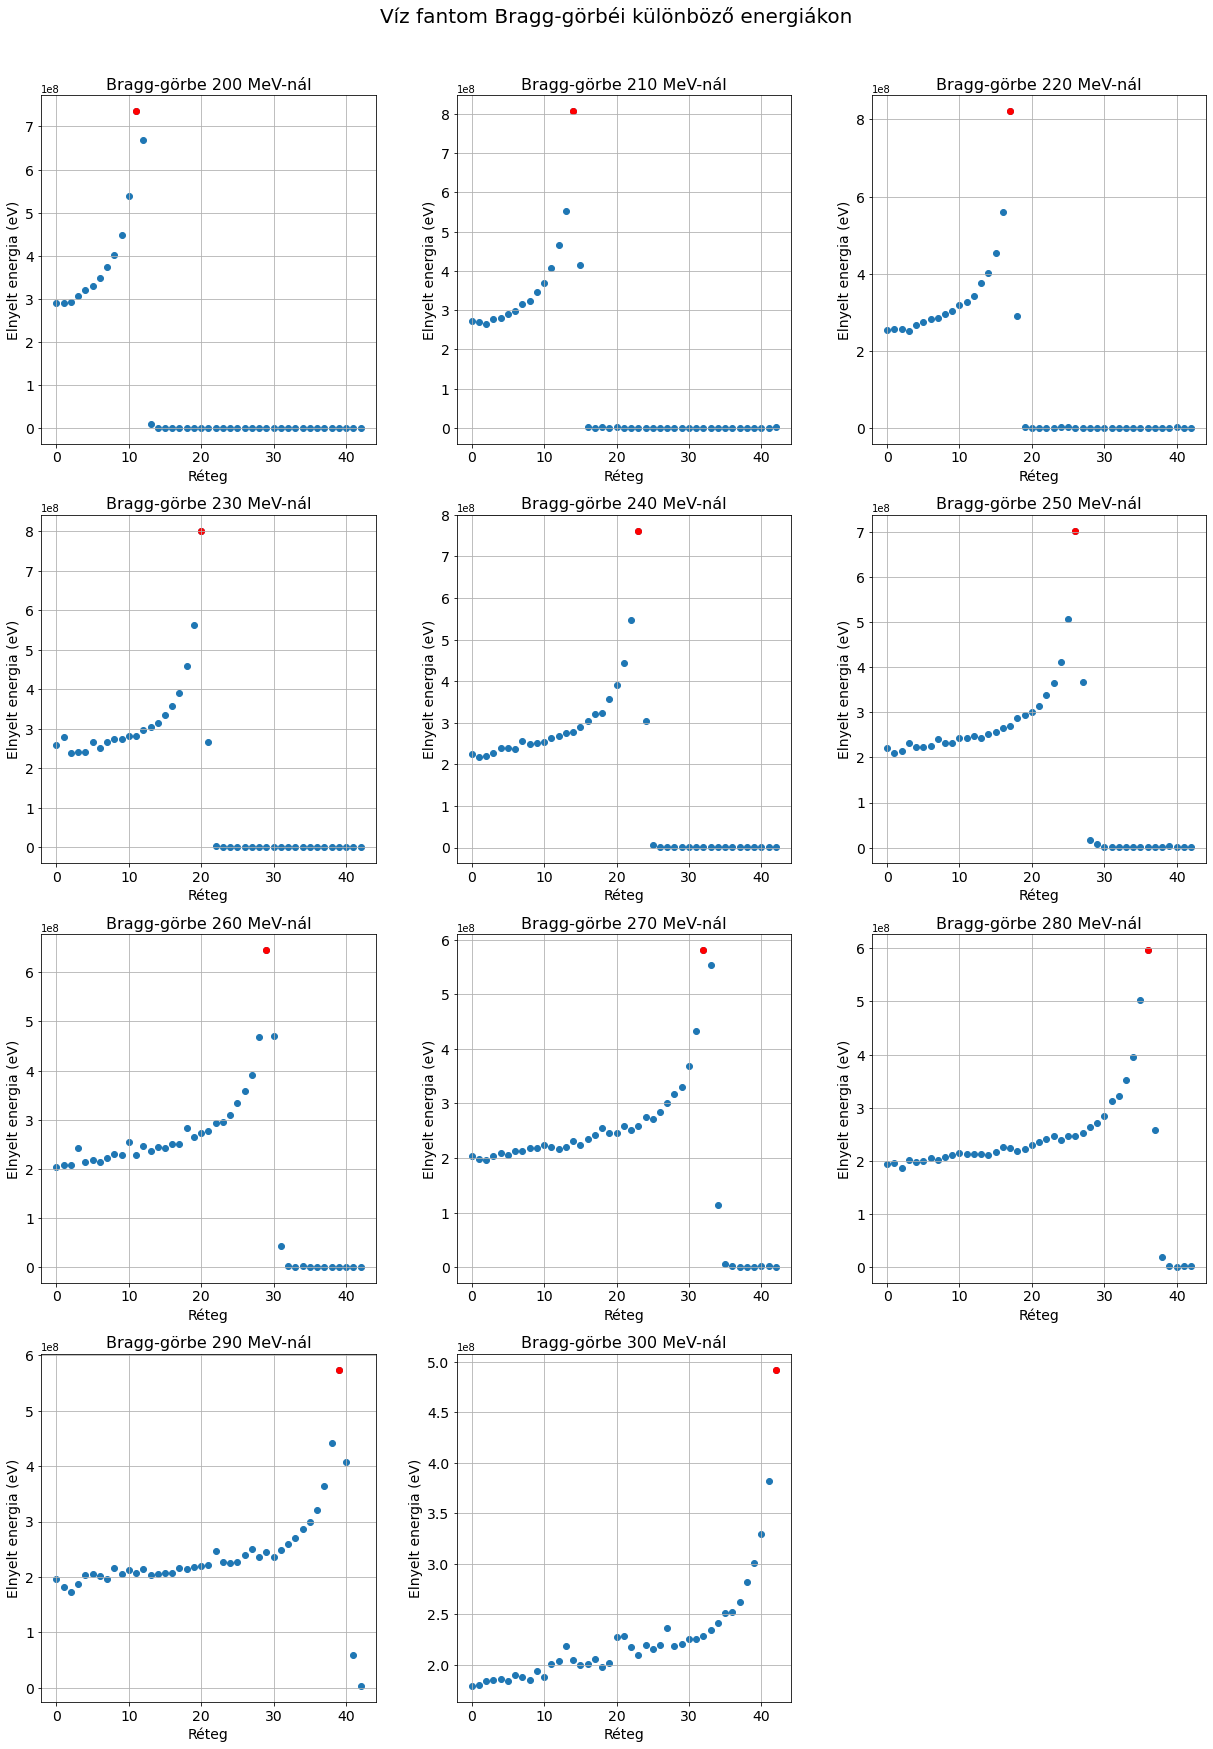

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths and energy values
file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy'
]
energy_values = [
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV'
]

# Number of plots per row
plots_per_row = 3

# Create multiple figures based on the number of datasets
fig, axs = plt.subplots(4, plots_per_row, figsize=(18, 24))
fig.tight_layout(pad=5.0)
fig.suptitle('Víz fantom Bragg-görbéi különböző energiákon', fontsize=20, y=1.02)

# Hide the last plot in the last row
axs[3, 2].axis('off')

for idx, file_path in enumerate(file_paths):
    row = idx // plots_per_row
    col = idx % plots_per_row
    
    if row == 3 and col == 2:
        break  # Skip the last cell

    ax = axs[row, col]

    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]

    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6

    max_energy_index = Myenergy.argmax()
    max_layer = Layers[max_energy_index]
    max_energy = Myenergy[max_energy_index]

    ax.scatter(Layers, Myenergy)
    ax.scatter(max_layer, max_energy, color='red')

    ax.set_xlabel('Réteg', fontsize=14)
    ax.set_ylabel('Elnyelt energia (eV)', fontsize=14)
    ax.set_title(f'Bragg-görbe {energy_values[idx]}-nál', fontsize=16)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()


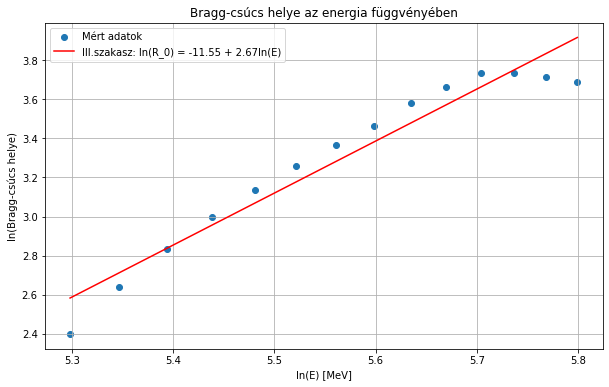

Meridő: 2.6671, y-metszet: -11.5490, R^2: 0.9377


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    # Fájl elérési útvonalak...
    # Fájl elérési útvonalak...
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    '320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    '330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
]

energy_values_eV = [
    # Energiaértékek eV-ban...
    '200 MeV', '210 MeV', '220 MeV', '230 MeV', '240 MeV', '250 MeV', '260 MeV', '270 MeV', '280 MeV', '290 MeV', '300 MeV', '310 MeV',
    '320 MeV', '330 MeV'
]


    

# A Bragg-csúcs helyének és az energiaértékek tárolása
bragg_peaks = []
energies_MeV = []

for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = (df[df.Layer == k]["edep"].sum()) * 1e6  # Az energiát MeV-ből eV-be konvertáljuk

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Az energiaértékek átváltása MeV-be
energies_MeV = [float(i.split()[0]) for i in energy_values_eV]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peaks)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás
plt.figure(figsize=(10, 6))
plt.scatter(ln_energies, ln_bragg_peaks, label='Mért adatok')
plt.plot(ln_energies, intercept + slope * ln_energies, 'r', label=f'Ill.szakasz: ln(R_0) = {intercept:.2f} + {slope:.2f}ln(E)')
plt.xlabel('ln(E) [MeV]')
plt.ylabel('ln(Bragg-csúcs helye)')
plt.title('Bragg-csúcs helye az energia függvényében')
plt.legend()
plt.grid(True)
plt.show()

print(f"Meridő: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    # Az ön fájl elérési útvonalai...
     '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    #'320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    #'330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [
    200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, #320, 330
]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)

# Minden elemhez 160 hozzáadása
distances_array += 160


distances = distances_array

ln_distances= np.log(np.array(distances))

bragg_peaks = []
energies_MeV = []

for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()  # Itt már nem szorozzuk meg 1e6-tal

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)


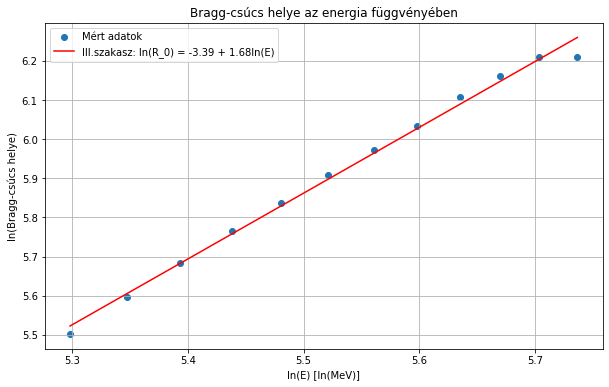

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [18]:
ln_bragg_peaks = ln_distances[bragg_peaks]

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás
plt.figure(figsize=(10, 6))
plt.scatter(ln_energies, ln_bragg_peaks, label='Mért adatok')
plt.plot(ln_energies, intercept + slope * ln_energies, 'r', label=f'Ill.szakasz: ln(R_0) = {intercept:.2f} + {slope:.2f}ln(E)')

#plt.plot(np.log([200, 310]), 1.76*np.log([200, 310])+np.log(0.02) )

plt.xlabel('ln(E) [ln(MeV)]')
plt.ylabel('ln(Bragg-csúcs helye)')
plt.title('Bragg-csúcs helye az energia függvényében')
plt.legend()
plt.grid(True)
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


In [ ]:
distances = np.array([6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547])
 
d = distances + 160

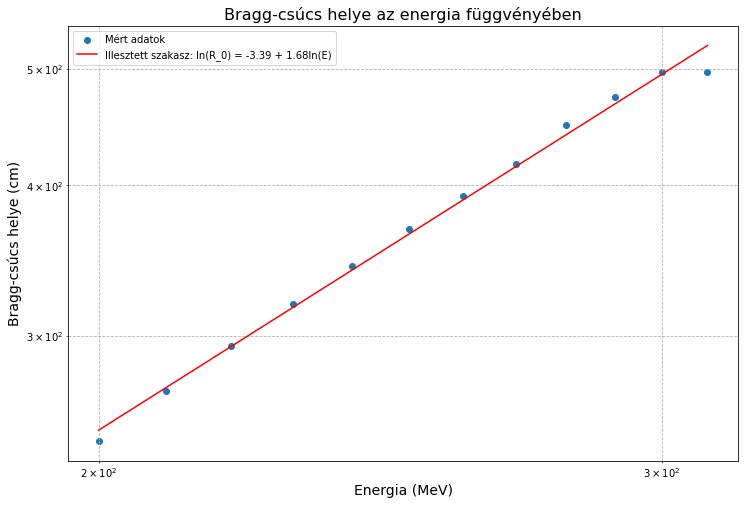

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    # Az ön fájl elérési útvonalai...
     '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    #'320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    #'330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [
    200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, #320, 330
]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)

# Minden elemhez 160 hozzáadása
distances_array += 160

distances = distances_array

bragg_peaks = []
energies_MeV = []

for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()  # Itt már nem szorozzuk meg 1e6-tal

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# A bragg_peaks indexek alapján a tényleges távolságok
bragg_peak_distances = distances[bragg_peaks]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peak_distances)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás logaritmikus skálán
plt.figure(figsize=(12, 8))
plt.scatter(energies_MeV, bragg_peak_distances, label='Mért adatok')
plt.plot(energies_MeV, np.exp(intercept + slope * np.log(energies_MeV)), 'r', label=f'Illesztett szakasz: ln(R_0) = {intercept:.2f} + {slope:.2f}ln(E)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia (MeV)', fontsize=14)
plt.ylabel('Bragg-csúcs helye (cm)', fontsize=14)
plt.title('Bragg-csúcs helye az energia függvényében', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


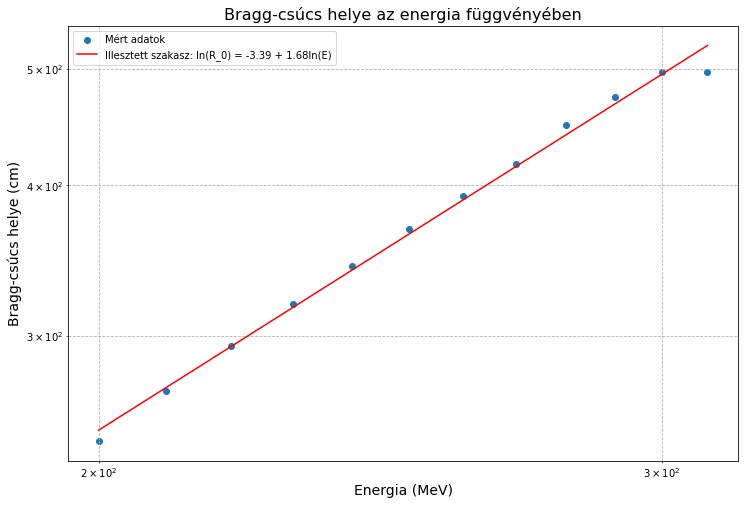

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    # Az ön fájl elérési útvonalai...
     '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
    #'320 eV víz fantom/1712235848_8981ef85-ba35-41f1-ac95-864e03d541c4_water_10000Primaries_1.hits.npy',
    #'330 eV víz fantom/1712236034_06b9ccbd-1407-415c-ac35-b98d40d1cff0_water_10000Primaries_1.hits.npy'
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [
    200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, #320, 330
]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)

# Minden elemhez 160 hozzáadása
distances_array += 160

distances = distances_array

bragg_peaks = []
energies_MeV = []

for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2*df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()  # Itt már nem szorozzuk meg 1e6-tal

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# A bragg_peaks indexek alapján a tényleges távolságok
bragg_peak_distances = distances[bragg_peaks]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peak_distances)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás logaritmikus skálán
plt.figure(figsize=(12, 8))
plt.scatter(energies_MeV, bragg_peak_distances, label='Mért adatok')
plt.plot(energies_MeV, np.exp(intercept + slope * np.log(energies_MeV)), 'r', label=f'Illesztett szakasz: ln(R_0) = {intercept:.2f} + {slope:.2f}ln(E)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia (MeV)', fontsize=14)
plt.ylabel('Bragg-csúcs helye (cm)', fontsize=14)
plt.title('Bragg-csúcs helye az energia függvényében', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


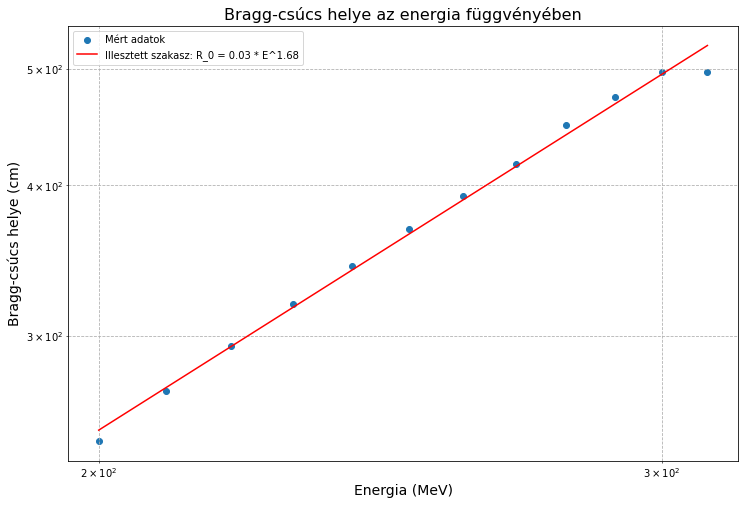

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [
    200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310,
]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)

# Minden elemhez 160 hozzáadása
distances_array += 160

distances = distances_array

bragg_peaks = []
energies_MeV = []

for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# A bragg_peaks indexek alapján a tényleges távolságok
bragg_peak_distances = distances[bragg_peaks]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peak_distances)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás logaritmikus skálán
plt.figure(figsize=(12, 8))
plt.scatter(energies_MeV, bragg_peak_distances, label='Mért adatok')
plt.plot(energies_MeV, np.exp(intercept + slope * np.log(energies_MeV)), 'r', label=f'Illesztett szakasz: R_0 = {np.exp(intercept):.2f} * E^{slope:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia (MeV)', fontsize=14)
plt.ylabel('Bragg-csúcs helye (cm)', fontsize=14)
plt.title('Bragg-csúcs helye az energia függvényében', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


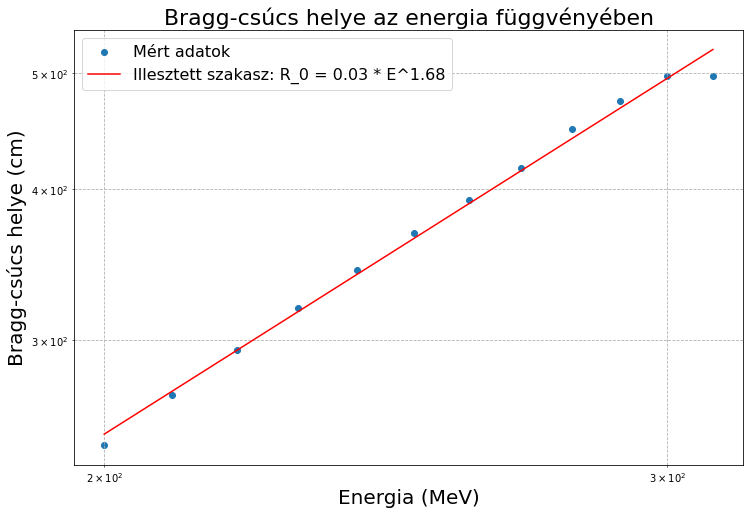

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)
distances_array += 160  # Minden elemhez 160 hozzáadása
distances = distances_array

bragg_peaks = []
for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# A bragg_peaks indexek alapján a tényleges távolságok
bragg_peak_distances = distances[bragg_peaks]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peak_distances)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás logaritmikus skálán
plt.figure(figsize=(12, 8))
plt.scatter(energies_MeV, bragg_peak_distances, label='Mért adatok')
plt.plot(energies_MeV, np.exp(intercept + slope * np.log(energies_MeV)), 'r', label=f'Illesztett szakasz: R_0 = {np.exp(intercept):.2f} * E^{slope:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia (MeV)', fontsize=20)
plt.ylabel('Bragg-csúcs helye (cm)', fontsize=20)
plt.title('Bragg-csúcs helye az energia függvényében', fontsize=22)
plt.legend(fontsize=16)
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


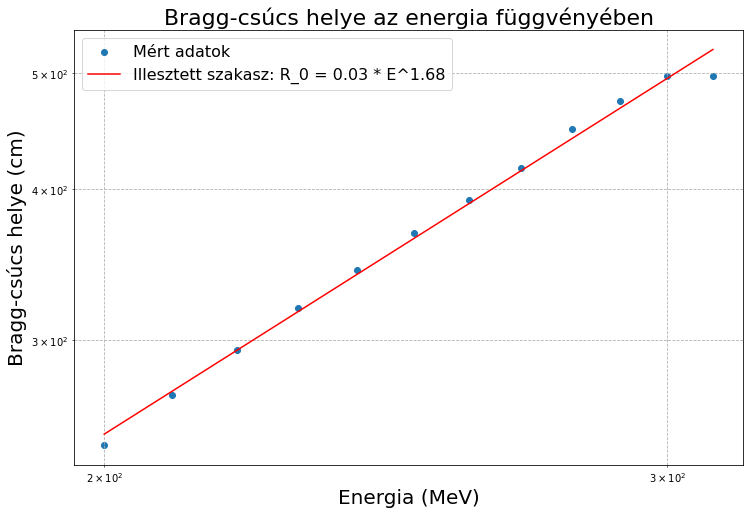

Meredekség: 1.6815, y-metszet: -3.3865, R^2: 0.9940


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_paths = [
    '200 eV víz fantom/1712225919_b01e19f0-064e-41f3-9730-b150983d234a_water_10000Primaries_1.hits.npy',
    '210 eV víz fantom/1712228120_74bb7c4c-87d9-4dd5-afe4-6c8ed69394da_water_10000Primaries_1.hits.npy',
    '220 eV víz fantom/1712228430_fed1e21b-67bb-4493-b90c-25bca19cb9bd_water_10000Primaries_1.hits.npy',
    '230 eV víz fantom/1712229399_ea093042-5a98-400c-8850-a46f55a7b51d_water_10000Primaries_1.hits.npy',
    '240 eV víz fantom/1712230479_3477d41f-aa57-4d68-8bf0-09c4024fb33a_water_10000Primaries_1.hits.npy',
    '250 eV víz fantom/1712231249_a013854c-58c8-455e-90b0-32dbc121feca_water_10000Primaries_1.hits.npy',
    '260 eV víz fantom/1712232305_f77c46dd-1059-4729-842e-b1f6b0ac0026_water_10000Primaries_1.hits.npy',
    '270 eV víz fantom/1712232593_2977adc2-31f4-4acb-8382-5d94ce86b690_water_10000Primaries_1.hits.npy',
    '280 eV víz fantom/1712233661_6aa5d3aa-f932-4a67-a3a0-52be7f76a8f7_water_10000Primaries_1.hits.npy',
    '290 eV víz fantom/1712234377_713c843a-01c5-42bc-806c-d57d61e64c79_water_10000Primaries_1.hits.npy',
    '300 eV víz fantom/1712234858_6a74e07f-c28b-4377-b2ed-d8c09aaac900_water_10000Primaries_1.hits.npy',
    '310 eV víz fantom/1712235620_6fe42a11-280b-4b7b-bbf3-ee7376e17952_water_10000Primaries_1.hits.npy',
]

# Az energiaértékek korrekciója MeV-ben
energy_values_MeV = [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310]

distances = [6, 7.8, 12.0641, 20.4418, 28.4256, 36.5092, 44.5708, 52.7015, 60.8289,
68.9507, 77.0426, 85.2433, 93.3829, 101.59, 109.718, 117.833, 126.021,
134.213, 142.302, 150.509, 158.656, 166.782, 174.98, 183.119, 191.326,
199.489, 207.671, 215.815, 224.026, 232.211, 240.41, 248.565, 256.793,
264.984, 273.119, 281.32, 289.52, 297.694, 305.907, 314.099, 322.307,
330.575, 337.547]

distances_array = np.array(distances)
distances_array += 160  # Minden elemhez 160 hozzáadása
distances = distances_array

bragg_peaks = []
for file_path in file_paths:
    data = np.load(file_path)
    df = pd.DataFrame(data)
    df['Layer'] = 2 * df["volumeID[2]"] + df["volumeID[3]"]
    
    Layers = df.Layer.unique()
    Myenergy = np.zeros(len(Layers))
    for i, k in enumerate(Layers):
        Myenergy[i] = df[df.Layer == k]["edep"].sum()

    max_layer = Layers[Myenergy.argmax()]
    bragg_peaks.append(max_layer)

# Mivel az energiák már MeV-ben vannak, nincs szükség átváltásra
energies_MeV = np.array(energy_values_MeV)

# A bragg_peaks indexek alapján a tényleges távolságok
bragg_peak_distances = distances[bragg_peaks]

# Logaritmikus transzformáció
ln_energies = np.log(energies_MeV)
ln_bragg_peaks = np.log(bragg_peak_distances)

# Lineáris regresszió
slope, intercept, r_value, p_value, std_err = linregress(ln_energies, ln_bragg_peaks)

# Ábrázolás logaritmikus skálán
plt.figure(figsize=(12, 8))
plt.scatter(energies_MeV, bragg_peak_distances, label='Mért adatok')
plt.plot(energies_MeV, np.exp(intercept + slope * np.log(energies_MeV)), 'r', label=f'Illesztett szakasz: R_0 = {np.exp(intercept):.2f} * E^{slope:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energia (MeV)', fontsize=20)
plt.ylabel('Bragg-csúcs helye (cm)', fontsize=20)
plt.title('Bragg-csúcs helye az energia függvényében', fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Meredekség: {slope:.4f}, y-metszet: {intercept:.4f}, R^2: {r_value**2:.4f}")


In [12]:
np.exp(3.1439)
#np.exp(-12.0823)

23.19414787301792